In [43]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import os

os.environ['PYTHONWARNINGS'] = 'ignore'
os.environ['MEM_LIMIT'] = '4G'  # Increase memory limit

# Vondelpark

## Air Quality Index

In [44]:
# Load data from Sentinel-2 (NDVI) and Sentinel-5P (AQI)
Vondel_NDVI_csv_path = "Datasets/Sentinel-2/Vondel_NDVI/Vondel_NDVI_csv.csv"
Vondel_AQI_csv_path = "Datasets/Sentinel-5P/Vondelpark/Vondel_AirQualityIndex/Vondel_AirQualityIndex_csv.csv"
Vondel_NDVI_csv = pd.read_csv(Vondel_NDVI_csv_path)
Vondel_AQI_csv = pd.read_csv(Vondel_AQI_csv_path)

In [45]:
# Check data structure
Vondel_NDVI_csv

,Date,Coordinates,Value
0,2024-03-01,"626205.0, 5802955.0",0.074513
1,2024-03-01,"626215.0, 5802955.0",0.072915
2,2024-03-01,"626225.0, 5802955.0",0.071516
3,2024-03-01,"626235.0, 5802955.0",0.068068
4,2024-03-01,"626245.0, 5802955.0",0.061473
...,...,...,...
271195,2024-06-01,"628155.0, 5801835.0",0.184967
271196,2024-06-01,"628165.0, 5801835.0",0.153550
271197,2024-06-01,"628175.0, 5801835.0",0.182766
271198,2024-06-01,"628185.0, 5801835.0",0.143232


In [46]:
# Check data structure
Vondel_AQI_csv

,Date,Coordinates,Value
0,2024-03-01,"626205.0, 5802955.0",118.564835
1,2024-03-01,"626215.0, 5802955.0",118.564835
2,2024-03-01,"626225.0, 5802955.0",118.564835
3,2024-03-01,"626235.0, 5802955.0",118.564835
4,2024-03-01,"626245.0, 5802955.0",118.564835
...,...,...,...
271195,2024-06-01,"628155.0, 5801835.0",99.465904
271196,2024-06-01,"628165.0, 5801835.0",99.465904
271197,2024-06-01,"628175.0, 5801835.0",99.465904
271198,2024-06-01,"628185.0, 5801835.0",99.465904


In [47]:
# Merge the two indices together on Date to ensure that Values are aligned
Vondel_merged_csv = pd.merge(Vondel_NDVI_csv, Vondel_AQI_csv, left_index=True, right_index=True, how="inner")
Vondel_merged_csv

,Date_x,Coordinates_x,Value_x,Date_y,Coordinates_y,Value_y
0,2024-03-01,"626205.0, 5802955.0",0.074513,2024-03-01,"626205.0, 5802955.0",118.564835
1,2024-03-01,"626215.0, 5802955.0",0.072915,2024-03-01,"626215.0, 5802955.0",118.564835
2,2024-03-01,"626225.0, 5802955.0",0.071516,2024-03-01,"626225.0, 5802955.0",118.564835
3,2024-03-01,"626235.0, 5802955.0",0.068068,2024-03-01,"626235.0, 5802955.0",118.564835
4,2024-03-01,"626245.0, 5802955.0",0.061473,2024-03-01,"626245.0, 5802955.0",118.564835
...,...,...,...,...,...,...
271195,2024-06-01,"628155.0, 5801835.0",0.184967,2024-06-01,"628155.0, 5801835.0",99.465904
271196,2024-06-01,"628165.0, 5801835.0",0.153550,2024-06-01,"628165.0, 5801835.0",99.465904
271197,2024-06-01,"628175.0, 5801835.0",0.182766,2024-06-01,"628175.0, 5801835.0",99.465904
271198,2024-06-01,"628185.0, 5801835.0",0.143232,2024-06-01,"628185.0, 5801835.0",99.465904


In [48]:
# Cleaning merged .csv
# Drop missing values
Vondel_merged_csv_cleaned = Vondel_merged_csv.copy().dropna()

# Combine Date columns
Vondel_merged_csv_cleaned.loc[:, 'Date'] = Vondel_merged_csv_cleaned['Date_x'].combine_first(
    Vondel_merged_csv_cleaned['Date_y']
)

# Combine Coordinates columns
Vondel_merged_csv_cleaned.loc[:, 'Coordinates'] = Vondel_merged_csv_cleaned['Coordinates_x'].combine_first(
    Vondel_merged_csv_cleaned['Coordinates_y']
)

# Drop redundant columns
Vondel_merged_csv_cleaned.drop(columns=['Date_x', 'Date_y', 'Coordinates_x', 'Coordinates_y'], inplace=True)

# Rename Value columns to NDVI and AQI
Vondel_merged_csv_cleaned.rename(columns={'Value_x': 'NDVI', 'Value_y': 'AQI'}, inplace=True)

Vondel_merged_csv_cleaned

,NDVI,AQI,Date,Coordinates
0,0.074513,118.564835,2024-03-01,"626205.0, 5802955.0"
1,0.072915,118.564835,2024-03-01,"626215.0, 5802955.0"
2,0.071516,118.564835,2024-03-01,"626225.0, 5802955.0"
3,0.068068,118.564835,2024-03-01,"626235.0, 5802955.0"
4,0.061473,118.564835,2024-03-01,"626245.0, 5802955.0"
...,...,...,...,...
271195,0.184967,99.465904,2024-06-01,"628155.0, 5801835.0"
271196,0.153550,99.465904,2024-06-01,"628165.0, 5801835.0"
271197,0.182766,99.465904,2024-06-01,"628175.0, 5801835.0"
271198,0.143232,99.465904,2024-06-01,"628185.0, 5801835.0"


In [49]:
# Define 2% data cumulative cut-off from bottom and top of data
# This is done to remove outliers and thus focus on central range of data

# Get NDVI values and sort
ndvi_data = Vondel_merged_csv_cleaned['NDVI'].copy()
sorted_ndvi_data = ndvi_data.sort_values().reset_index(drop=True)

# Calculate cumulative percentages
cumulative_percentage = sorted_ndvi_data.rank(pct=True)

# Define cumulative cut-off range (2% to 98%)
lower_cut = 0.02 # 2%
upper_cut = 0.98 # 98%

# Filter NDVI values within the range
filtered_NDVI_data = sorted_ndvi_data[
    (cumulative_percentage >= lower_cut) &
    (cumulative_percentage <= upper_cut)
    ]

In [50]:
# Set lower and upper values for NDVI
lower_cut_value = filtered_NDVI_data.min()
upper_cut_value = filtered_NDVI_data.max()

# Keep rows where NDVI value is within range
Vondel_merged_csv_final = Vondel_merged_csv_cleaned[
    (Vondel_merged_csv_cleaned['NDVI'] >= lower_cut_value) &
    (Vondel_merged_csv_cleaned['NDVI'] <= upper_cut_value)
]

Vondel_merged_csv_final

,NDVI,AQI,Date,Coordinates
0,0.074513,118.564835,2024-03-01,"626205.0, 5802955.0"
1,0.072915,118.564835,2024-03-01,"626215.0, 5802955.0"
2,0.071516,118.564835,2024-03-01,"626225.0, 5802955.0"
3,0.068068,118.564835,2024-03-01,"626235.0, 5802955.0"
4,0.061473,118.564835,2024-03-01,"626245.0, 5802955.0"
...,...,...,...,...
271195,0.184967,99.465904,2024-06-01,"628155.0, 5801835.0"
271196,0.153550,99.465904,2024-06-01,"628165.0, 5801835.0"
271197,0.182766,99.465904,2024-06-01,"628175.0, 5801835.0"
271198,0.143232,99.465904,2024-06-01,"628185.0, 5801835.0"


In [51]:
# Conduct correlation tests
Vondel_NDVI_Values = Vondel_merged_csv_final.loc[:, 'NDVI']
Vondel_AQI_Values = Vondel_merged_csv_final.loc[:, 'AQI']

pearson_corr, p_pearson = pearsonr(Vondel_NDVI_Values, Vondel_AQI_Values)
spearman_corr, p_spearman = spearmanr(Vondel_NDVI_Values, Vondel_AQI_Values)
kendall_corr, p_kendall = kendalltau(Vondel_NDVI_Values, Vondel_AQI_Values)

print("Pearson's Correlation:")
print(f"Coefficient: {pearson_corr:.4f}, p-value: {p_pearson:.4e}")

print("\nSpearman's Correlation:")
print(f"Coefficient: {spearman_corr:.4f}, p-value: {p_spearman:.4e}")

print("\nKendall's Tau Correlation:")
print(f"Coefficient: {kendall_corr:.4f}, p-value: {p_kendall:.4e}")

Pearson's Correlation:
Coefficient: -0.0428, p-value: 5.8434e-106

Spearman's Correlation:
Coefficient: -0.1731, p-value: 0.0000e+00

Kendall's Tau Correlation:
Coefficient: -0.1057, p-value: 0.0000e+00


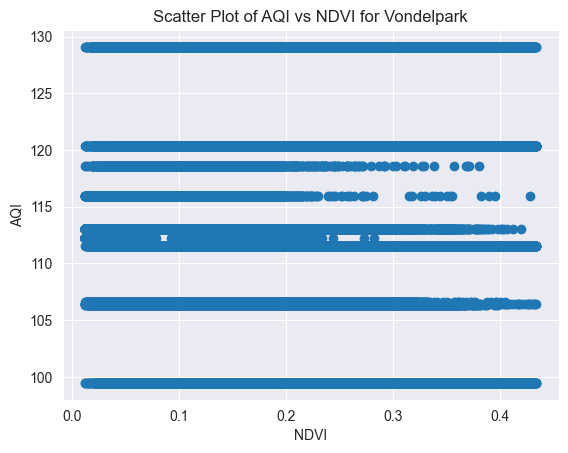

In [52]:
plt.scatter(Vondel_NDVI_Values, Vondel_AQI_Values)
plt.xlabel('NDVI')
plt.ylabel('AQI')
plt.title('Scatter Plot of AQI vs NDVI for Vondelpark')
plt.show()

## Land Surface Temperature

## Soil Moisture

# Westerpark

In [53]:
# Load data from Sentinel-2 (NDVI) and Sentinel-5P (AQI)
Wester_NDVI_csv = pd.read_csv("Datasets/Sentinel-2/Wester_NDVI/Wester_NDVI_csv.csv")
Wester_AQI_csv = pd.read_csv("Datasets/Sentinel-5P/Westerpark/Wester_AirQualityIndex/Wester_AirQualityIndex_csv.csv")

In [54]:
# Check data structure
Wester_NDVI_csv

,Date,Coordinates,Value
0,2024-06-01,"625525.0, 5806015.0",0.143509
1,2024-06-01,"625535.0, 5806015.0",0.156907
2,2024-06-01,"625545.0, 5806015.0",0.350465
3,2024-06-01,"625555.0, 5806015.0",0.339109
4,2024-06-01,"625565.0, 5806015.0",0.276658
...,...,...,...
163939,2024-03-01,"628005.0, 5805485.0",0.044651
163940,2024-03-01,"628015.0, 5805485.0",0.039928
163941,2024-03-01,"628025.0, 5805485.0",0.074082
163942,2024-03-01,"628035.0, 5805485.0",0.056077


In [55]:
# Check data structure
Wester_AQI_csv

,Date,Coordinates,Value
0,2024-06-01,"625525.0, 5806015.0",99.55050
1,2024-06-01,"625535.0, 5806015.0",99.55050
2,2024-06-01,"625545.0, 5806015.0",99.55050
3,2024-06-01,"625555.0, 5806015.0",99.55050
4,2024-06-01,"625565.0, 5806015.0",99.55050
...,...,...,...
163939,2024-03-01,"628005.0, 5805485.0",119.19639
163940,2024-03-01,"628015.0, 5805485.0",119.19639
163941,2024-03-01,"628025.0, 5805485.0",119.19639
163942,2024-03-01,"628035.0, 5805485.0",119.19639


In [56]:
# Merge the two indices together on Date to ensure that Values are aligned
Wester_merged_csv = pd.merge(Wester_NDVI_csv, Wester_AQI_csv, left_index=True, right_index=True, how="inner")
Wester_merged_csv

,Date_x,Coordinates_x,Value_x,Date_y,Coordinates_y,Value_y
0,2024-06-01,"625525.0, 5806015.0",0.143509,2024-06-01,"625525.0, 5806015.0",99.55050
1,2024-06-01,"625535.0, 5806015.0",0.156907,2024-06-01,"625535.0, 5806015.0",99.55050
2,2024-06-01,"625545.0, 5806015.0",0.350465,2024-06-01,"625545.0, 5806015.0",99.55050
3,2024-06-01,"625555.0, 5806015.0",0.339109,2024-06-01,"625555.0, 5806015.0",99.55050
4,2024-06-01,"625565.0, 5806015.0",0.276658,2024-06-01,"625565.0, 5806015.0",99.55050
...,...,...,...,...,...,...
163939,2024-03-01,"628005.0, 5805485.0",0.044651,2024-03-01,"628005.0, 5805485.0",119.19639
163940,2024-03-01,"628015.0, 5805485.0",0.039928,2024-03-01,"628015.0, 5805485.0",119.19639
163941,2024-03-01,"628025.0, 5805485.0",0.074082,2024-03-01,"628025.0, 5805485.0",119.19639
163942,2024-03-01,"628035.0, 5805485.0",0.056077,2024-03-01,"628035.0, 5805485.0",119.19639


In [57]:
# Cleaning merged .csv
# Drop missing values
Wester_merged_csv_cleaned = Wester_merged_csv.copy().dropna()

# Combine Date columns
Wester_merged_csv_cleaned.loc[:, 'Date'] = Wester_merged_csv_cleaned['Date_x'].combine_first(
    Wester_merged_csv_cleaned['Date_y']
)

# Combine Coordinates columns
Wester_merged_csv_cleaned.loc[:, 'Coordinates'] = Wester_merged_csv_cleaned['Coordinates_x'].combine_first(
    Wester_merged_csv_cleaned['Coordinates_y']
)

# Drop redundant columns
Wester_merged_csv_cleaned.drop(columns=['Date_x', 'Date_y', 'Coordinates_x', 'Coordinates_y'], inplace=True)

# Rename Value columns to NDVI and AQI
Wester_merged_csv_cleaned.rename(columns={'Value_x': 'NDVI', 'Value_y': 'AQI'}, inplace=True)

Wester_merged_csv_cleaned

,NDVI,AQI,Date,Coordinates
0,0.143509,99.55050,2024-06-01,"625525.0, 5806015.0"
1,0.156907,99.55050,2024-06-01,"625535.0, 5806015.0"
2,0.350465,99.55050,2024-06-01,"625545.0, 5806015.0"
3,0.339109,99.55050,2024-06-01,"625555.0, 5806015.0"
4,0.276658,99.55050,2024-06-01,"625565.0, 5806015.0"
...,...,...,...,...
163939,0.044651,119.19639,2024-03-01,"628005.0, 5805485.0"
163940,0.039928,119.19639,2024-03-01,"628015.0, 5805485.0"
163941,0.074082,119.19639,2024-03-01,"628025.0, 5805485.0"
163942,0.056077,119.19639,2024-03-01,"628035.0, 5805485.0"


In [58]:
# Define 2% data cumulative cut-off from bottom and top of data
# This is done to remove outliers and thus focus on central range of data

# Get NDVI values and sort
ndvi_data = Wester_merged_csv_cleaned['NDVI'].copy()
sorted_ndvi_data = ndvi_data.sort_values().reset_index(drop=True)

# Calculate cumulative percentages
cumulative_percentage = sorted_ndvi_data.rank(pct=True)

# Define cumulative cut-off range (2% to 98%)
lower_cut = 0.02  # 2%
upper_cut = 0.98  # 98%

# Filter NDVI values within the range
filtered_NDVI_data = sorted_ndvi_data[
    (cumulative_percentage >= lower_cut) &
    (cumulative_percentage <= upper_cut)
    ]

In [59]:
# Set lower and upper values for NDVI
lower_cut_value = filtered_NDVI_data.min()
upper_cut_value = filtered_NDVI_data.max()

# Keep rows where NDVI value is within range
Wester_merged_csv_final = Wester_merged_csv_cleaned[
    (Wester_merged_csv_cleaned['NDVI'] >= lower_cut_value) &
    (Wester_merged_csv_cleaned['NDVI'] <= upper_cut_value)
    ]

Wester_merged_csv_final

,NDVI,AQI,Date,Coordinates
0,0.143509,99.55050,2024-06-01,"625525.0, 5806015.0"
1,0.156907,99.55050,2024-06-01,"625535.0, 5806015.0"
2,0.350465,99.55050,2024-06-01,"625545.0, 5806015.0"
3,0.339109,99.55050,2024-06-01,"625555.0, 5806015.0"
4,0.276658,99.55050,2024-06-01,"625565.0, 5806015.0"
...,...,...,...,...
163939,0.044651,119.19639,2024-03-01,"628005.0, 5805485.0"
163940,0.039928,119.19639,2024-03-01,"628015.0, 5805485.0"
163941,0.074082,119.19639,2024-03-01,"628025.0, 5805485.0"
163942,0.056077,119.19639,2024-03-01,"628035.0, 5805485.0"


In [60]:
# Conduct correlation tests
Wester_NDVI_Values = Wester_merged_csv_final.loc[:, 'NDVI']
Wester_AQI_Values = Wester_merged_csv_final.loc[:, 'AQI']

pearson_corr, p_pearson = pearsonr(Wester_NDVI_Values, Wester_AQI_Values)
spearman_corr, p_spearman = spearmanr(Wester_NDVI_Values, Wester_AQI_Values)
kendall_corr, p_kendall = kendalltau(Wester_NDVI_Values, Wester_AQI_Values)

print("Pearson's Correlation:")
print(f"Coefficient: {pearson_corr:.4f}, p-value: {p_pearson:.4e}")

print("\nSpearman's Correlation:")
print(f"Coefficient: {spearman_corr:.4f}, p-value: {p_spearman:.4e}")

print("\nKendall's Tau Correlation:")
print(f"Coefficient: {kendall_corr:.4f}, p-value: {p_kendall:.4e}")

Pearson's Correlation:
Coefficient: 0.0152, p-value: 1.7852e-09

Spearman's Correlation:
Coefficient: -0.0955, p-value: 0.0000e+00

Kendall's Tau Correlation:
Coefficient: -0.0567, p-value: 3.5094e-230


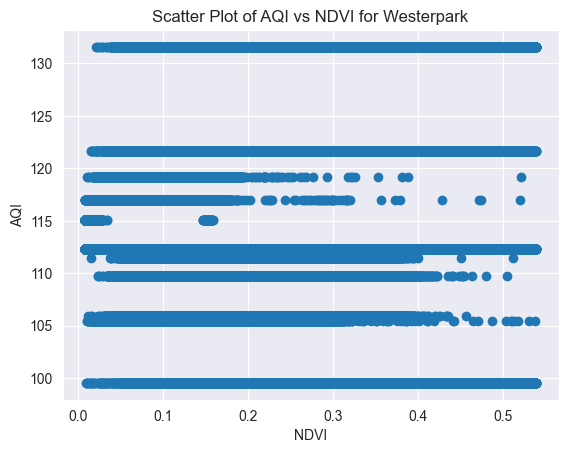

In [61]:
plt.scatter(Wester_NDVI_Values, Wester_AQI_Values)
plt.xlabel('NDVI')
plt.ylabel('AQI')
plt.title('Scatter Plot of AQI vs NDVI for Westerpark')
plt.show()

# Amstelpark

In [62]:
# Load data from Sentinel-2 (NDVI) and Sentinel-5P (AQI)
Amstel_NDVI_csv = pd.read_csv("Datasets/Sentinel-2/Amstel_NDVI/Amstel_NDVI_csv.csv")
Amstel_AQI_csv = pd.read_csv("Datasets/Sentinel-5P/Amstelpark/Amstel_AirQualityIndex/Amstel_AirQualityIndex_csv.csv")

In [63]:
# Check data structure
Amstel_NDVI_csv

,Date,Coordinates,Value
0,2024-05-01,"628805.0, 5800115.0",0.140768
1,2024-05-01,"628815.0, 5800115.0",0.087506
2,2024-05-01,"628825.0, 5800115.0",0.071327
3,2024-05-01,"628835.0, 5800115.0",0.061595
4,2024-05-01,"628845.0, 5800115.0",0.069783
...,...,...,...
96991,2024-10-01,"629345.0, 5798755.0",0.339383
96992,2024-10-01,"629355.0, 5798755.0",0.323331
96993,2024-10-01,"629365.0, 5798755.0",0.317505
96994,2024-10-01,"629375.0, 5798755.0",0.321112


In [64]:
# Check data structure
Amstel_AQI_csv

,Date,Coordinates,Value
0,2024-05-01,"628805.0, 5800115.0",107.47069
1,2024-05-01,"628815.0, 5800115.0",107.47069
2,2024-05-01,"628825.0, 5800115.0",107.47069
3,2024-05-01,"628835.0, 5800115.0",107.47069
4,2024-05-01,"628845.0, 5800115.0",107.47069
...,...,...,...
96991,2024-10-01,"629345.0, 5798755.0",106.13067
96992,2024-10-01,"629355.0, 5798755.0",106.13067
96993,2024-10-01,"629365.0, 5798755.0",106.13067
96994,2024-10-01,"629375.0, 5798755.0",106.13067


In [65]:
# Merge the two indices together on Date to ensure that Values are aligned
Amstel_merged_csv = pd.merge(Amstel_NDVI_csv, Amstel_AQI_csv, left_index=True, right_index=True, how="inner")
Amstel_merged_csv

,Date_x,Coordinates_x,Value_x,Date_y,Coordinates_y,Value_y
0,2024-05-01,"628805.0, 5800115.0",0.140768,2024-05-01,"628805.0, 5800115.0",107.47069
1,2024-05-01,"628815.0, 5800115.0",0.087506,2024-05-01,"628815.0, 5800115.0",107.47069
2,2024-05-01,"628825.0, 5800115.0",0.071327,2024-05-01,"628825.0, 5800115.0",107.47069
3,2024-05-01,"628835.0, 5800115.0",0.061595,2024-05-01,"628835.0, 5800115.0",107.47069
4,2024-05-01,"628845.0, 5800115.0",0.069783,2024-05-01,"628845.0, 5800115.0",107.47069
...,...,...,...,...,...,...
96991,2024-10-01,"629345.0, 5798755.0",0.339383,2024-10-01,"629345.0, 5798755.0",106.13067
96992,2024-10-01,"629355.0, 5798755.0",0.323331,2024-10-01,"629355.0, 5798755.0",106.13067
96993,2024-10-01,"629365.0, 5798755.0",0.317505,2024-10-01,"629365.0, 5798755.0",106.13067
96994,2024-10-01,"629375.0, 5798755.0",0.321112,2024-10-01,"629375.0, 5798755.0",106.13067


In [66]:
# Cleaning merged .csv
# Drop missing values
Amstel_merged_csv_cleaned = Amstel_merged_csv.copy().dropna()

# Combine Date columns
Amstel_merged_csv_cleaned.loc[:, 'Date'] = Amstel_merged_csv_cleaned['Date_x'].combine_first(
    Amstel_merged_csv_cleaned['Date_y']
)

# Combine Coordinates columns
Amstel_merged_csv_cleaned.loc[:, 'Coordinates'] = Amstel_merged_csv_cleaned['Coordinates_x'].combine_first(
    Amstel_merged_csv_cleaned['Coordinates_y']
)

# Drop redundant columns
Amstel_merged_csv_cleaned.drop(columns=['Date_x', 'Date_y', 'Coordinates_x', 'Coordinates_y'], inplace=True)

# Rename Value columns to NDVI and AQI
Amstel_merged_csv_cleaned.rename(columns={'Value_x': 'NDVI', 'Value_y': 'AQI'}, inplace=True)

Amstel_merged_csv_cleaned

,NDVI,AQI,Date,Coordinates
0,0.140768,107.47069,2024-05-01,"628805.0, 5800115.0"
1,0.087506,107.47069,2024-05-01,"628815.0, 5800115.0"
2,0.071327,107.47069,2024-05-01,"628825.0, 5800115.0"
3,0.061595,107.47069,2024-05-01,"628835.0, 5800115.0"
4,0.069783,107.47069,2024-05-01,"628845.0, 5800115.0"
...,...,...,...,...
96991,0.339383,106.13067,2024-10-01,"629345.0, 5798755.0"
96992,0.323331,106.13067,2024-10-01,"629355.0, 5798755.0"
96993,0.317505,106.13067,2024-10-01,"629365.0, 5798755.0"
96994,0.321112,106.13067,2024-10-01,"629375.0, 5798755.0"


In [67]:
# Define 2% data cumulative cut-off from bottom and top of data
# This is done to remove outliers and thus focus on central range of data

# Get NDVI values and sort
ndvi_data = Amstel_merged_csv_cleaned['NDVI'].copy()
sorted_ndvi_data = ndvi_data.sort_values().reset_index(drop=True)

# Calculate cumulative percentages
cumulative_percentage = sorted_ndvi_data.rank(pct=True)

# Define cumulative cut-off range (2% to 98%)
lower_cut = 0.02  # 2%
upper_cut = 0.98  # 98%

# Filter NDVI values within the range
filtered_NDVI_data = sorted_ndvi_data[
    (cumulative_percentage >= lower_cut) &
    (cumulative_percentage <= upper_cut)
    ]

In [68]:
# Set lower and upper values for NDVI
lower_cut_value = filtered_NDVI_data.min()
upper_cut_value = filtered_NDVI_data.max()

# Keep rows where NDVI value is within range
Amstel_merged_csv_final = Amstel_merged_csv_cleaned[
    (Amstel_merged_csv_cleaned['NDVI'] >= lower_cut_value) &
    (Amstel_merged_csv_cleaned['NDVI'] <= upper_cut_value)
    ]

Amstel_merged_csv_final

,NDVI,AQI,Date,Coordinates
0,0.140768,107.47069,2024-05-01,"628805.0, 5800115.0"
1,0.087506,107.47069,2024-05-01,"628815.0, 5800115.0"
2,0.071327,107.47069,2024-05-01,"628825.0, 5800115.0"
3,0.061595,107.47069,2024-05-01,"628835.0, 5800115.0"
4,0.069783,107.47069,2024-05-01,"628845.0, 5800115.0"
...,...,...,...,...
96991,0.339383,106.13067,2024-10-01,"629345.0, 5798755.0"
96992,0.323331,106.13067,2024-10-01,"629355.0, 5798755.0"
96993,0.317505,106.13067,2024-10-01,"629365.0, 5798755.0"
96994,0.321112,106.13067,2024-10-01,"629375.0, 5798755.0"


In [69]:
# Conduct correlation tests
Amstel_NDVI_Values = Amstel_merged_csv_final.loc[:, 'NDVI']
Amstel_AQI_Values = Amstel_merged_csv_final.loc[:, 'AQI']

pearson_corr, p_pearson = pearsonr(Amstel_NDVI_Values, Amstel_AQI_Values)
spearman_corr, p_spearman = spearmanr(Amstel_NDVI_Values, Amstel_AQI_Values)
kendall_corr, p_kendall = kendalltau(Amstel_NDVI_Values, Amstel_AQI_Values)

print("Pearson's Correlation:")
print(f"Coefficient: {pearson_corr:.4f}, p-value: {p_pearson:.4e}")

print("\nSpearman's Correlation:")
print(f"Coefficient: {spearman_corr:.4f}, p-value: {p_spearman:.4e}")

print("\nKendall's Tau Correlation:")
print(f"Coefficient: {kendall_corr:.4f}, p-value: {p_kendall:.4e}")

Pearson's Correlation:
Coefficient: 0.0710, p-value: 2.9234e-104

Spearman's Correlation:
Coefficient: -0.0715, p-value: 9.3965e-106

Kendall's Tau Correlation:
Coefficient: -0.0289, p-value: 5.6449e-37


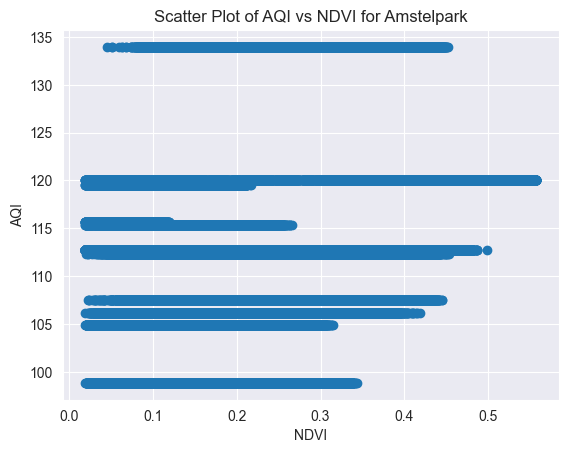

In [70]:
plt.scatter(Amstel_NDVI_Values, Amstel_AQI_Values)
plt.xlabel('NDVI')
plt.ylabel('AQI')
plt.title('Scatter Plot of AQI vs NDVI for Amstelpark')
plt.show()

# Rembrandtpark

In [71]:
# Load data from Sentinel-2 (NDVI) and Sentinel-5P (AQI)
Rembrandt_NDVI_csv = pd.read_csv("Datasets/Sentinel-2/Rembrandt_NDVI/Rembrandt_NDVI_csv.csv")
Rembrandt_AQI_csv = pd.read_csv("Datasets/Sentinel-5P/Rembrandtpark/Rembrandt_AirQualityIndex/Rembrandt_AirQualityIndex_csv.csv")

In [72]:
# Check data structure
Rembrandt_NDVI_csv

,Date,Coordinates,Value
0,2024-07-01,"625455.0, 5804045.0",0.141978
1,2024-07-01,"625465.0, 5804045.0",0.157536
2,2024-07-01,"625475.0, 5804045.0",0.132379
3,2024-07-01,"625485.0, 5804045.0",0.130872
4,2024-07-01,"625495.0, 5804045.0",0.139994
...,...,...,...
133807,2024-02-01,"625995.0, 5802165.0",0.016421
133808,2024-02-01,"626005.0, 5802165.0",0.015698
133809,2024-02-01,"626015.0, 5802165.0",0.016961
133810,2024-02-01,"626025.0, 5802165.0",0.015487


In [73]:
# Check data structure
Rembrandt_AQI_csv

,Date,Coordinates,Value
0,2024-07-01,"625455.0, 5804045.0",112.666145
1,2024-07-01,"625465.0, 5804045.0",112.666145
2,2024-07-01,"625475.0, 5804045.0",112.666145
3,2024-07-01,"625485.0, 5804045.0",112.666145
4,2024-07-01,"625495.0, 5804045.0",112.666145
...,...,...,...
133807,2024-02-01,"625995.0, 5802165.0",113.495316
133808,2024-02-01,"626005.0, 5802165.0",113.495316
133809,2024-02-01,"626015.0, 5802165.0",113.495316
133810,2024-02-01,"626025.0, 5802165.0",113.495316


In [74]:
# Merge the two indices together on Date to ensure that Values are aligned
Rembrandt_merged_csv = pd.merge(Rembrandt_NDVI_csv, Rembrandt_AQI_csv, left_index=True, right_index=True, how="inner")
Rembrandt_merged_csv

,Date_x,Coordinates_x,Value_x,Date_y,Coordinates_y,Value_y
0,2024-07-01,"625455.0, 5804045.0",0.141978,2024-07-01,"625455.0, 5804045.0",112.666145
1,2024-07-01,"625465.0, 5804045.0",0.157536,2024-07-01,"625465.0, 5804045.0",112.666145
2,2024-07-01,"625475.0, 5804045.0",0.132379,2024-07-01,"625475.0, 5804045.0",112.666145
3,2024-07-01,"625485.0, 5804045.0",0.130872,2024-07-01,"625485.0, 5804045.0",112.666145
4,2024-07-01,"625495.0, 5804045.0",0.139994,2024-07-01,"625495.0, 5804045.0",112.666145
...,...,...,...,...,...,...
133807,2024-02-01,"625995.0, 5802165.0",0.016421,2024-02-01,"625995.0, 5802165.0",113.495316
133808,2024-02-01,"626005.0, 5802165.0",0.015698,2024-02-01,"626005.0, 5802165.0",113.495316
133809,2024-02-01,"626015.0, 5802165.0",0.016961,2024-02-01,"626015.0, 5802165.0",113.495316
133810,2024-02-01,"626025.0, 5802165.0",0.015487,2024-02-01,"626025.0, 5802165.0",113.495316


In [75]:
# Cleaning merged .csv
# Drop missing values
Rembrandt_merged_csv_cleaned = Rembrandt_merged_csv.copy().dropna()

# Combine Date columns
Rembrandt_merged_csv_cleaned.loc[:, 'Date'] = Rembrandt_merged_csv_cleaned['Date_x'].combine_first(
    Rembrandt_merged_csv_cleaned['Date_y']
)

# Combine Coordinates columns
Rembrandt_merged_csv_cleaned.loc[:, 'Coordinates'] = Rembrandt_merged_csv_cleaned['Coordinates_x'].combine_first(
    Rembrandt_merged_csv_cleaned['Coordinates_y']
)

# Drop redundant columns
Rembrandt_merged_csv_cleaned.drop(columns=['Date_x', 'Date_y', 'Coordinates_x', 'Coordinates_y'], inplace=True)

# Rename Value columns to NDVI and AQI
Rembrandt_merged_csv_cleaned.rename(columns={'Value_x': 'NDVI', 'Value_y': 'AQI'}, inplace=True)

Rembrandt_merged_csv_cleaned

,NDVI,AQI,Date,Coordinates
0,0.141978,112.666145,2024-07-01,"625455.0, 5804045.0"
1,0.157536,112.666145,2024-07-01,"625465.0, 5804045.0"
2,0.132379,112.666145,2024-07-01,"625475.0, 5804045.0"
3,0.130872,112.666145,2024-07-01,"625485.0, 5804045.0"
4,0.139994,112.666145,2024-07-01,"625495.0, 5804045.0"
...,...,...,...,...
133807,0.016421,113.495316,2024-02-01,"625995.0, 5802165.0"
133808,0.015698,113.495316,2024-02-01,"626005.0, 5802165.0"
133809,0.016961,113.495316,2024-02-01,"626015.0, 5802165.0"
133810,0.015487,113.495316,2024-02-01,"626025.0, 5802165.0"


In [76]:
# Define 2% data cumulative cut-off from bottom and top of data
# This is done to remove outliers and thus focus on central range of data

# Get NDVI values and sort
ndvi_data = Rembrandt_merged_csv_cleaned['NDVI'].copy()
sorted_ndvi_data = ndvi_data.sort_values().reset_index(drop=True)

# Calculate cumulative percentages
cumulative_percentage = sorted_ndvi_data.rank(pct=True)

# Define cumulative cut-off range (2% to 98%)
lower_cut = 0.02  # 2%
upper_cut = 0.98  # 98%

# Filter NDVI values within the range
filtered_NDVI_data = sorted_ndvi_data[
    (cumulative_percentage >= lower_cut) &
    (cumulative_percentage <= upper_cut)
    ]

In [77]:
# Set lower and upper values for NDVI
lower_cut_value = filtered_NDVI_data.min()
upper_cut_value = filtered_NDVI_data.max()

# Keep rows where NDVI value is within range
Rembrandt_merged_csv_final = Rembrandt_merged_csv_cleaned[
    (Rembrandt_merged_csv_cleaned['NDVI'] >= lower_cut_value) &
    (Rembrandt_merged_csv_cleaned['NDVI'] <= upper_cut_value)
    ]

Rembrandt_merged_csv_final

,NDVI,AQI,Date,Coordinates
0,0.141978,112.666145,2024-07-01,"625455.0, 5804045.0"
1,0.157536,112.666145,2024-07-01,"625465.0, 5804045.0"
2,0.132379,112.666145,2024-07-01,"625475.0, 5804045.0"
3,0.130872,112.666145,2024-07-01,"625485.0, 5804045.0"
4,0.139994,112.666145,2024-07-01,"625495.0, 5804045.0"
...,...,...,...,...
133807,0.016421,113.495316,2024-02-01,"625995.0, 5802165.0"
133808,0.015698,113.495316,2024-02-01,"626005.0, 5802165.0"
133809,0.016961,113.495316,2024-02-01,"626015.0, 5802165.0"
133810,0.015487,113.495316,2024-02-01,"626025.0, 5802165.0"


In [78]:
# Conduct correlation tests
Rembrandt_NDVI_Values = Rembrandt_merged_csv_final.loc[:, 'NDVI']
Rembrandt_AQI_Values = Rembrandt_merged_csv_final.loc[:, 'AQI']

pearson_corr, p_pearson = pearsonr(Rembrandt_NDVI_Values, Rembrandt_AQI_Values)
spearman_corr, p_spearman = spearmanr(Rembrandt_NDVI_Values, Rembrandt_AQI_Values)
kendall_corr, p_kendall = kendalltau(Rembrandt_NDVI_Values, Rembrandt_AQI_Values)

print("Pearson's Correlation:")
print(f"Coefficient: {pearson_corr:.4f}, p-value: {p_pearson:.4e}")

print("\nSpearman's Correlation:")
print(f"Coefficient: {spearman_corr:.4f}, p-value: {p_spearman:.4e}")

print("\nKendall's Tau Correlation:")
print(f"Coefficient: {kendall_corr:.4f}, p-value: {p_kendall:.4e}")

Pearson's Correlation:
Coefficient: 0.0315, p-value: 1.6345e-29

Spearman's Correlation:
Coefficient: -0.1365, p-value: 0.0000e+00

Kendall's Tau Correlation:
Coefficient: -0.0995, p-value: 0.0000e+00


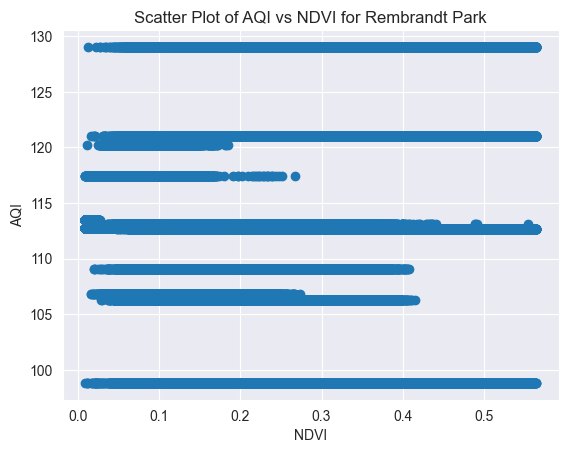

In [79]:
plt.scatter(Rembrandt_NDVI_Values, Rembrandt_AQI_Values)
plt.xlabel('NDVI')
plt.ylabel('AQI')
plt.title('Scatter Plot of AQI vs NDVI for Rembrandt Park')
plt.show()